**Analisis data** adalah proses mengolah data mulai dari mengidentifikasi, membersihkan, mengubah, hingga memodelkannya agar menghasilkan informasi yang bermanfaat. Informasi ini kemudian digunakan untuk membantu pengambilan keputusan yang lebih tepat. Dalam prosesnya, data akan diubah menjadi sebuah laporan yang mudah dipahami dan dianalisis sebagai dasar pengambilan keputusan.

**Perbedaan Descriptive Analysis vs Exploratory Data Analysis (EDA)**

Analisis Deskriptif (Descriptive Analytics) adalah jenis analisis data yang mampu menjawab pertanyaan “Apa yang telah terjadi?” dengan menganalisis sumber data historis. Teknik ini merangkum data dalam skala besar untuk menyajikan hasil kepada para pemangku kepentingan. Analisis deskriptif membantu memantau pencapaian tujuan, baik keberhasilan maupun kegagalan.

Sedangkan Exploratory Data Analysis (EDA) adalah proses analisis awal data yang bertujuan untuk memahami karakteristik, struktur, dan komponen penting dari dataset sebelum melakukan analisis statistik atau pemodelan prediktif lebih lanjut. EDA tidak hanya berfokus pada pengujian hipotesis atau pemodelan statistik, tetapi lebih kepada eksplorasi awal untuk memahami apa yang bisa diungkapkan oleh data. Proses ini termasuk data cleaning, analisis statistika deskriptif, visualisasi data, dan penilaian kualitas data.

**Pentingnya Data Cleaning & Wrangling**

Data Cleaninng adalah proses membersihkan data dengan menghapus data duplikat atau data kosong. Proses ini penting agar hasil prediksi tiap bias. Sedangkan Data Wrangling adalah proses mengubah format data. Proses ini penting agar data bisa sesuai dengan format proses atau untuk normalisasi data yang terlalu berbeda.

**Peran Visualisasi Data**
1. Menyederhanakan kompleksitas data.
2. Mengidentifikasi tren dan pola dengan cepat.
3. Mendeteksi outlier (pencilan) yang mungkin merusak model.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.shape

(731, 16)

In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df = df.drop(columns=['instant', 'atemp', 'casual', 'registered'])

In [7]:
df = df.rename(columns={'yr':'year',
                        'mnth':'month',
                        'temp':'temperature',
                        'hum':'humidity',
                        'weathersit':'weather',
                        'cnt':'count',})

In [8]:
df.isnull().sum()

dteday         0
season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weather        0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dteday       731 non-null    object 
 1   season       731 non-null    int64  
 2   year         731 non-null    int64  
 3   month        731 non-null    int64  
 4   holiday      731 non-null    int64  
 5   weekday      731 non-null    int64  
 6   workingday   731 non-null    int64  
 7   weather      731 non-null    int64  
 8   temperature  731 non-null    float64
 9   humidity     731 non-null    float64
 10  windspeed    731 non-null    float64
 11  count        731 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 68.7+ KB


In [11]:
df.describe()

,season,year,month,holiday,weekday,workingday,weather,temperature,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000


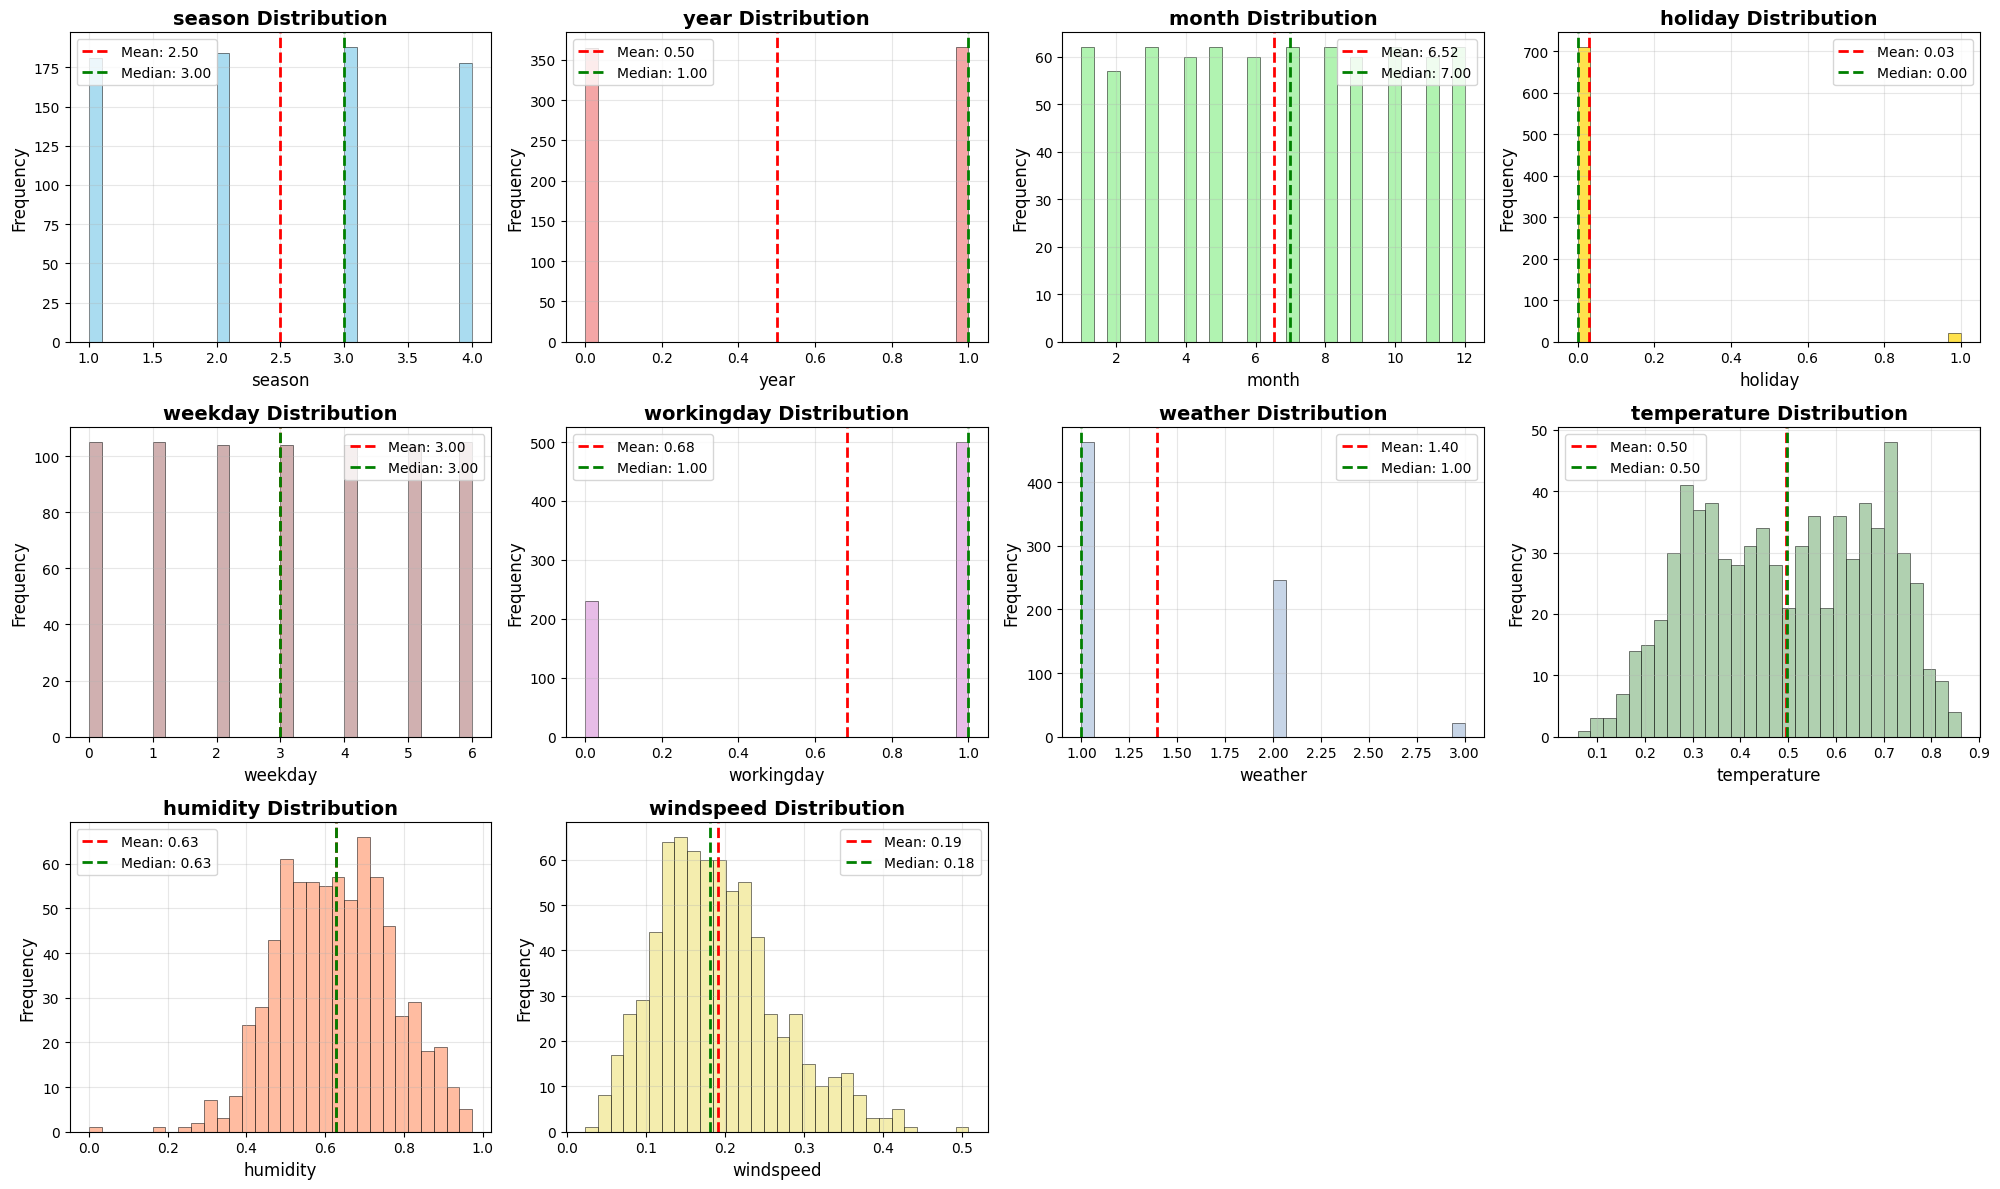

In [12]:
import matplotlib.pyplot as plt

features = ['season', 'year', 'month', 'holiday', 'weekday',
            'workingday', 'weather', 'temperature', 'humidity', 'windspeed']

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.ravel()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'rosybrown',
          'plum', 'lightsteelblue', 'darkseagreen', 'lightsalmon', 'khaki']

for i, (feature, color) in enumerate(zip(features, colors)):
    if feature in df.columns:
        # Plot histogram
        axes[i].hist(df[feature], bins=30, alpha=0.7, color=color,
                    edgecolor='black', linewidth=0.5)

        # Add vertical lines for mean and median
        axes[i].axvline(df[feature].mean(), color='red', linestyle='--',
                       linewidth=2, label=f'Mean: {df[feature].mean():.2f}')
        axes[i].axvline(df[feature].median(), color='green', linestyle='--',
                       linewidth=2, label=f'Median: {df[feature].median():.2f}')

        # Customize the plot
        axes[i].set_title(f'{feature} Distribution', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)
        axes[i].legend()
        axes[i].grid(alpha=0.3)

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Bisa kita lihat penyebaran distribusi dari masing-masing kolom beserta mean dan mediannya.

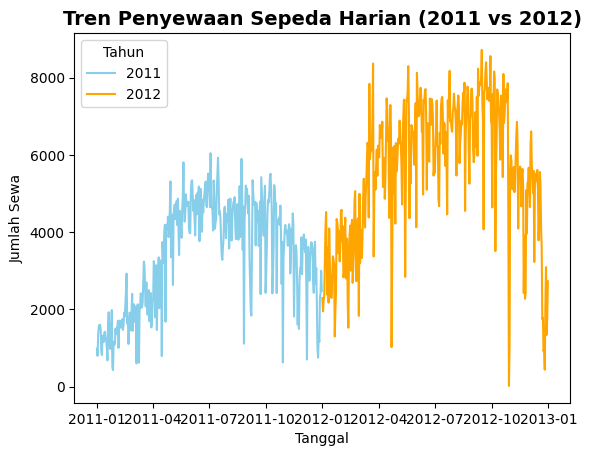

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['dteday'] = pd.to_datetime(df['dteday'])
df['season_label'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['weather_label'] = df['weather'].map({
    1: 'Clear',
    2: 'Cloudy',
    3: 'Rain'
})
df['yr_label'] = df['year'].map({0: '2011', 1: '2012'})

def get_day_type(row):
    if row['holiday'] == 1:
        return 'Holiday'
    elif row['workingday'] == 1:
        return 'Weekday'
    else:
        return 'Weekend'

df['day_type'] = df.apply(get_day_type, axis=1)

sns.lineplot(data=df, x='dteday', y='count', hue='yr_label', palette=['skyblue', 'orange'])
plt.title('Tren Penyewaan Sepeda Harian (2011 vs 2012)', fontsize=14, fontweight='bold')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sewa')
plt.legend(title='Tahun')

Perbandingan antara penyewaan sepeda di tahun 2011 dan 2012. Terdapat peningkatan keseluruhan pada tahun 2012. Selain itu pada kedua tahun, jumlah tertingginya berada pada bulan ke-4 hinggan bulan ke-10.

Text(0, 0.5, 'Jumlah Sewa')

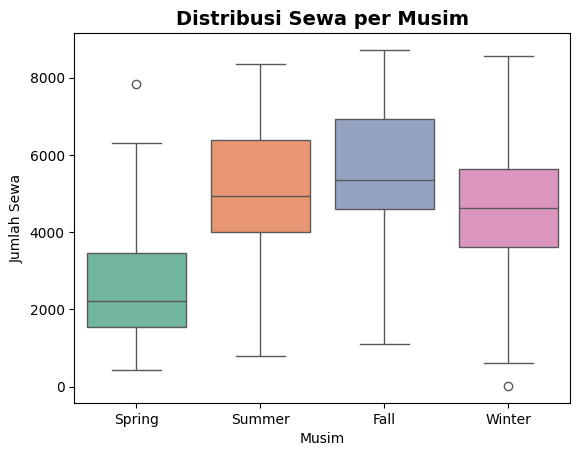

In [14]:
sns.boxplot(data=df, x='season_label', y='count', hue='season_label', order=['Spring', 'Summer', 'Fall', 'Winter'], palette='Set2', legend=False)
plt.title('Distribusi Sewa per Musim', fontsize=14, fontweight='bold')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')

Perbandingan jumlah sewa permusim. Musim gugur (fall) menempati posisi pertama dengan jumlah sewa tertinggi. Diikuti oleh musim panas (summer) dan musim dingin (winter). Posisi terakhir dengan jumlah sewa terendah adalah musim semi (spring)

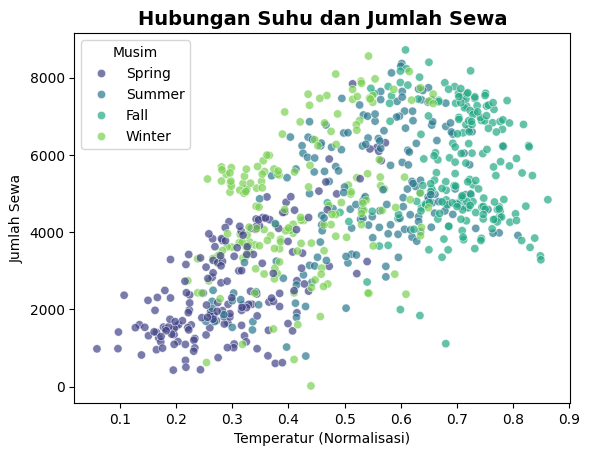

In [15]:
scatter = sns.scatterplot(data=df, x='temperature', y='count', hue='season_label', palette='viridis', alpha=0.7)
plt.title('Hubungan Suhu dan Jumlah Sewa', fontsize=14, fontweight='bold')
plt.xlabel('Temperatur (Normalisasi)')
plt.ylabel('Jumlah Sewa')
plt.legend(title='Musim')

Di data ini temperatur suhu adalah variabel paling berpengaruh. Bisa kita lihat penyewaan tertinggi berada pada suhu 0.6 (yang dinormalisasi). Pada suhu rendah terdapat pengurangan jumlah penyewaan secara drastis


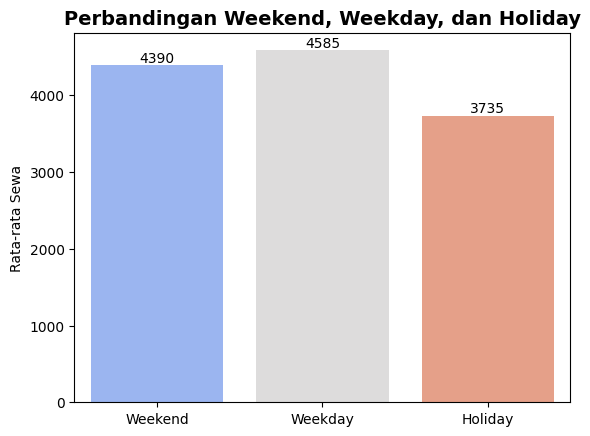

In [16]:
sns.barplot(data=df, x='day_type', y='count', hue='day_type', estimator='mean', palette='coolwarm', errorbar=None, legend=False)
plt.title('Perbandingan Weekend, Weekday, dan Holiday', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Rata-rata Sewa')
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

df = df.drop(columns=['season_label', 'yr_label', 'weather_label', 'day_type'])

Perbandingan antara weekend (sabtu minggu), weekday (hari kerja), dan holiday. Bisa dilihat weekday memiliki rata-rata sewa terbanyak sebanyak 4585, diikuti dengan weekend dengan 4390, dan holiday dengan 3735.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dteday       731 non-null    datetime64[ns]
 1   season       731 non-null    int64         
 2   year         731 non-null    int64         
 3   month        731 non-null    int64         
 4   holiday      731 non-null    int64         
 5   weekday      731 non-null    int64         
 6   workingday   731 non-null    int64         
 7   weather      731 non-null    int64         
 8   temperature  731 non-null    float64       
 9   humidity     731 non-null    float64       
 10  windspeed    731 non-null    float64       
 11  count        731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 68.7 KB


In [18]:
X = df.drop(columns=['dteday', 'count'])
y = df['count']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [20]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 200, max_depth = 15, random_state = 42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [21]:
prediction = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print("=== Hasil Evaluasi Model ===")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-Squared: {r2:.4f}")

=== Hasil Evaluasi Model ===
Mean Absolute Error (MAE): 415.6531
Root Mean Squared Error (RMSE): 587.3412
R-Squared: 0.9217


In [23]:
import joblib
joblib.dump(model, 'model_regresi_bikesharing.joblib')

['model_regresi_bikesharing.joblib']